In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [38]:
df = pd.read_csv("clientes-centro-comercial.csv")
df.dropna()

,IDcliente,Genero,Edad,Ingresos Anuales (k$),Puntos en compras (1-100)
0,1,Hombre,19,15,39
1,2,Hombre,21,15,81
2,3,Mujer,20,16,6
3,4,Mujer,23,16,77
4,5,Mujer,31,17,40
...,...,...,...,...,...
195,196,Mujer,35,120,79
196,197,Mujer,45,126,28
197,198,Hombre,32,126,74
198,199,Hombre,32,137,18


In [46]:
modelo = LinearRegression()
x = df['Edad'].to_numpy(dtype='float').reshape(-1,1)
y = df['Puntos en compras (1-100)'].to_numpy(dtype='float')


In [47]:
modelo.fit(x,y)
print(modelo.score(x,y))


0.10707740876869032


In [52]:
b0 = modelo.intercept_
print(b0)
b = modelo.coef_
print(b)
y_=modelo.predict(x)
print(y_)

73.70119104335399
[-0.60492126]
[62.20768706 60.99784453 61.6027658  59.78800201 54.94863191 60.39292327
 52.52894686 59.78800201 34.98623025 55.55355317 33.17146646 52.52894686
 38.61575783 59.18308075 51.31910434 60.39292327 52.52894686 61.6027658
 42.2452854  52.52894686 52.52894686 58.57815948 45.87481297 54.94863191
 41.03544287 56.15847443 46.47973424 52.52894686 49.50434055 59.78800201
 37.4059153  60.99784453 41.64036414 62.81260832 44.06004919 60.99784453
 48.29449802 55.55355317 51.9240256  61.6027658  34.38130899 59.18308075
 44.66497045 54.94863191 44.06004919 59.18308075 43.45512792 57.36831696
 56.15847443 54.94863191 44.06004919 53.73878938 54.94863191 38.01083656
 43.45512792 45.26989171 42.85020666 31.96162394 57.36831696 41.64036414
 31.35670268 62.20768706 33.17146646 41.03544287 35.59115151 62.81260832
 47.68957676 32.5665452  62.20768706 54.34371065 31.35670268 45.26989171
 37.4059153  37.4059153  38.01083656 57.97323822 46.47973424 49.50434055
 59.78800201 44.0600

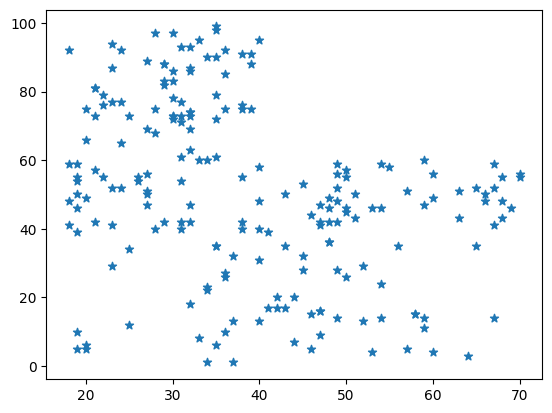

In [51]:
fig = plt.figure()
plt.scatter(df['Edad'],df['Puntos en compras (1-100)'], marker ='*')


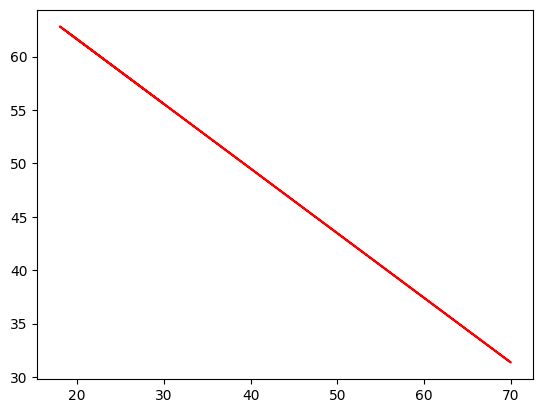

In [53]:
plt.plot(x,y_,c='r')

Cuadratico

In [63]:
df2 = df
df2.Edad = df2.Edad**2

x_2 = df2['Edad'].to_numpy(dtype='float').reshape(-1,1)
y_2 = df2['Puntos en compras (1-100)'].to_numpy(dtype='float')

transformador = PolynomialFeatures()
transformador.fit(x_2)
x_2_ = transformador.transform(x_2)



In [64]:
modelo_2 = LinearRegression()
modelo_2.fit(x_2_,y_2)
modelo_2.score(x_2_,y_2)


0.016688282723348102

In [65]:
modelo_2.intercept_

51.71786021034936

In [66]:
modelo_2.coef_

array([ 0.00000000e+00,  0.00000000e+00, -2.14951259e-37])

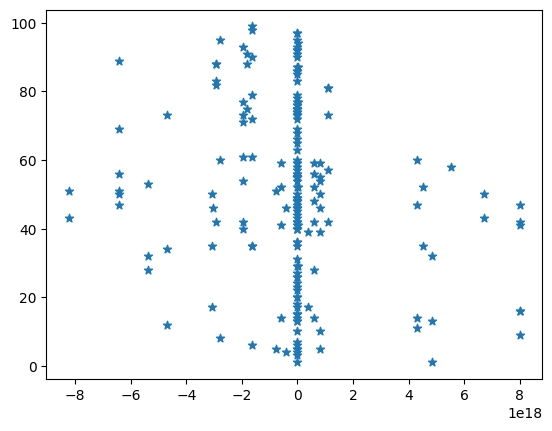

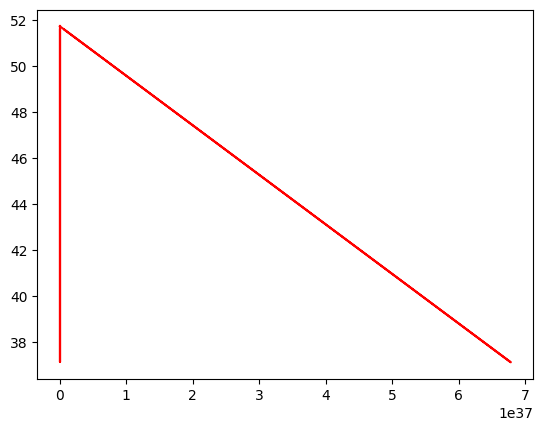

In [76]:
y_2_ = modelo_2.predict(x_2_)
plt.clf()
plt.scatter(df2['Edad'],df2['Puntos en compras (1-100)'], marker ='*')
plt.show()
plt.plot(x_2_,y_2_,c='r')